# Machine Learning Assessment 2019
## This assessment concerns the well-known Boston House Prices dataset and the Python packages Scipy, Keras, and Jupyter.

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [6]:
data = pd.read_csv('boston.csv')
data.rename(columns={'medv':'Price'}, inplace=True)

In [25]:
print(data.shape)

(506, 15)


In [7]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston Housing Dataset
The Boston Housing Dataset is a derived from data collected in 1978 by the Uunied States Census Service concerning housing in suburbs of Boston Massachusetts. The dataset column headings are described as follows:
The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- Black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- Price - Median value of owner-occupied homes in $1000’s

In [9]:
print(data.shape)

(506, 15)


## After loading the data, check to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [10]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
Price         0
dtype: int64

### The price of the houses is our target variable and the remaining columns are the feature variables which we will use to predict the value of a house.

In [11]:
# Calculate and print statistics
print ("Statistics for Boston housing dataset as follows:\n")
print ("Minimum price: ${:,.2f}".format(data.Price.min()))
print ("Maximum price: ${:,.2f}".format(data.Price.max()))
print ("Mean price: ${:,.2f}".format(data.Price.mean()))
print ("Median price ${:,.2f}".format(data.Price.median()))
print ("Standard deviation of prices: ${:,.2f}".format(data.Price.std(ddof=0)))
print ("First quartile of prices: ${:,.2f}".format(np.percentile(data.Price, 25)))
print ("Second quartile of prices: ${:,.2f}".format(np.percentile(data.Price, 75)))
print ("Interquartile (IQR) of prices: ${:,.2f}".format((np.percentile(data.Price, 75)-(np.percentile(data.Price, 25)))))

Statistics for Boston housing dataset as follows:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


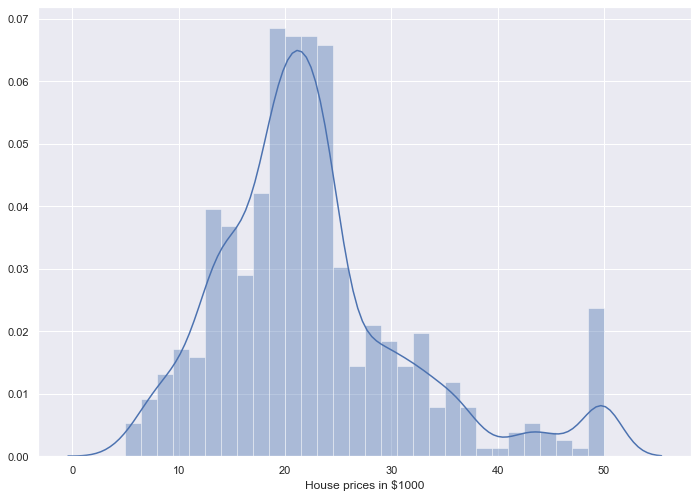

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Price'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

### This plot shows the Price of most houses are distributed normally with a few outliers. 

## Regression model with one variable 'rm'

In [13]:
# define the data df as a dataframe
df = pd.DataFrame(data)

# Put the target housing price in another dataFrame
target = pd.DataFrame(data, columns=["Price"])

In [14]:
import statsmodels.api as sm

X = df["rm"]
y = target["Price"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics from statsmodel
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):                   3.74e-256
Time:                        22:39:54   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regrssion model with more than one variable

In [15]:
X = df[["rm","lstat"]]
y = target["Price"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):                        0.00
Time:                        22:39:57   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rm             4.9069      0.070     69.906      0.000       4.769       5.045
lstat         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple regression analysis

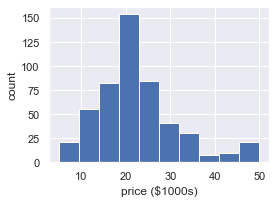

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(data.Price)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

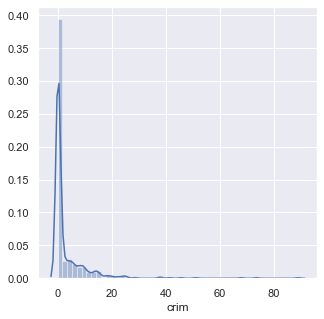

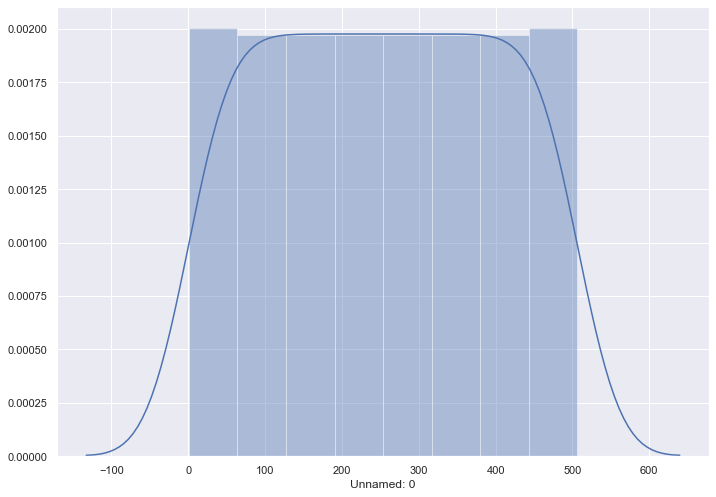

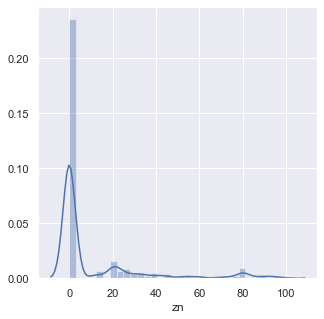

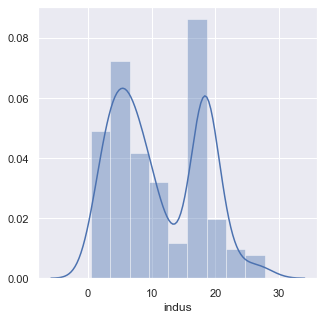

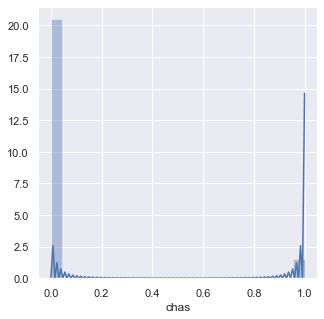

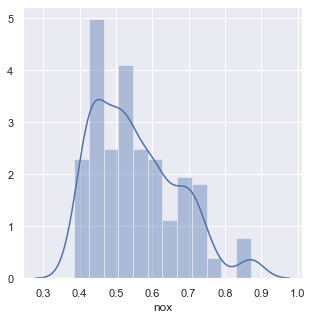

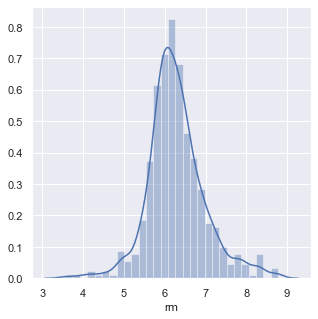

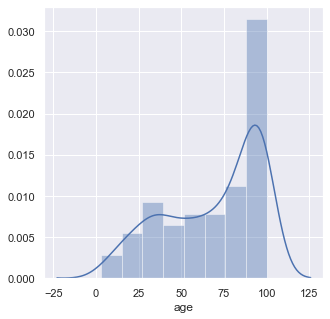

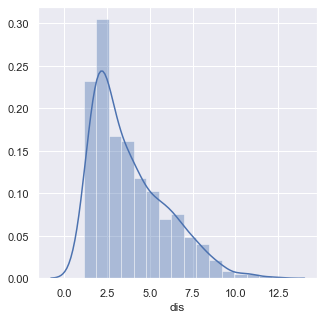

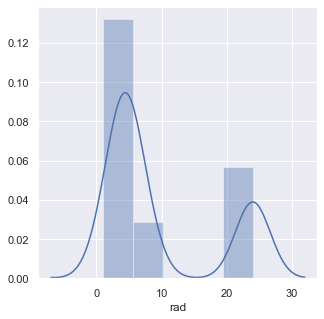

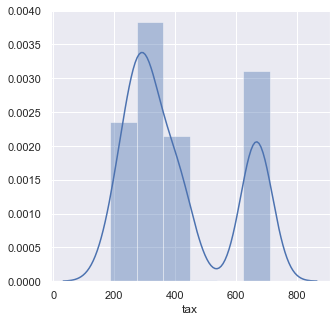

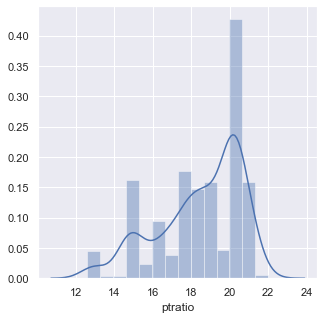

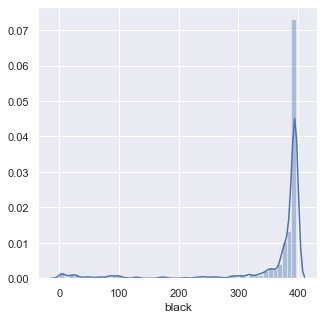

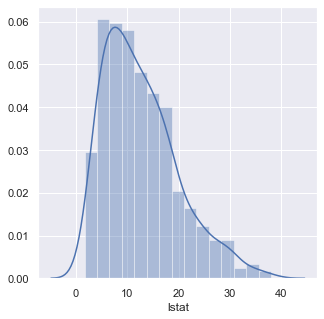

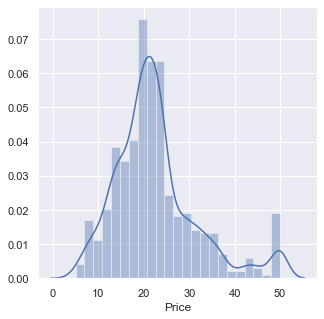

<Figure size 360x360 with 0 Axes>

In [48]:
for i, col in enumerate(df.columns):
    fig=plt.figure(figsize=(5,5))
    plt.figure(i)
    sns.distplot(df[col])
    #sns.scatterplot(data)
    

## T-test

In [16]:
# Two different methods of conducting a t-test
# import researchpy as rp
from scipy import stats

In [17]:
X = df["rm"]
y = target["Price"]

In [22]:
stats.ttest_ind(data['rm'], data['Price'])

Ttest_indResult(statistic=-39.62461149680032, pvalue=6.49016750007408e-208)